In [1]:
from whatsapp_analytics import Whatsapp_Analytics
from config import strings_to_exclude
from plotly.offline import init_notebook_mode, iplot

# For plots within a jupyter notebook
init_notebook_mode(connected=True)

# path where the exported chat is located 
path = '/home/nicolas/Escritorio/PyProjects/whatsappalytics/data/RenamedContact.txt'

# List of languages used in the chat (used for stopwords in wordcloud)
languages = ['german'] 

# The main analysis object. The exclude argument takes a list of strings which by default is
# the "strings_to_exclude" list from the config.py file. Every message in the chat will be ignored 
# if it contains one or more of the strings in exclude. This is meant to be used for messages 
# which are generated by whatsapp itself for example when people leave groups or for the 
# "media omitted" stuff. 
wa = Whatsapp_Analytics(path, languages = languages, exclude=strings_to_exclude)

# Whatsapp_Analytics will automatically detect the given format of the exported chat. 
# If the format is not known, an error will be thrown. Until now I found just two different formats:
# iphone and android. Maybe this also depends on whatsapp versions ...
# You can also pass groups of an arbitrary number of participants 
print(f'The following chat export format was detected: {wa.format}')
print(f'The following chat participants were found: {wa.names}')
print(f'Messages containing the following strings are ignored: {wa.exclude}')

# ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ 
# In the following cells you will find all possible outputs of Whatsapp_Analytics 
# which are available until now. You will find an additional comment in the cell
# if an output function allows further arguments (except of nb_mode=True which is always used 
# within a notebook). 


The following chat export format was detected: android
The following chat participants were found: ['Nicolas', 'RenamedContact']
Messages containing the following strings are ignored: ['<Medien ausgeschlossen>', 'Audio weggelassen', 'Ende-zu-Ende-Verschlüsselung', 'Media omitted', 'Audio omitted']


In [2]:
wa.show_summary_statistics()

,Nicolas,RenamedContact
Number messages sent,990.000,1075.000
Average message size in words,11.331,8.556
Average message size in characters,62.657,54.197
Average respond time for all messages (minutes),283.935,333.745
Average respond time for intraday messages (minutes),83.460,44.635


In [3]:
iplot(wa.plot_overall_participition(nb_mode=True))

In [4]:
iplot(wa.plot_chronology(nb_mode=True))

In [5]:
iplot(wa.plot_most_used_emojis(nb_mode=True))

In [6]:
iplot(wa.plot_intraday_active_time(nb_mode=True))

In [7]:
# tail = False means, that only he first 30 minutes are shown. Otherwise it would look too messy.
# The cell below shows the same plot with tail=True. 
iplot(wa.plot_dist_of_respondtimes(nb_mode=True, tail=False))

In [8]:
iplot(wa.plot_dist_of_respondtimes(nb_mode=True, tail=True))

In [9]:
iplot(wa.plot_dist_of_weekdays(nb_mode=True))

In [10]:
iplot(wa.plot_dist_of_message_size(nb_mode=True, words_or_chars='words'))

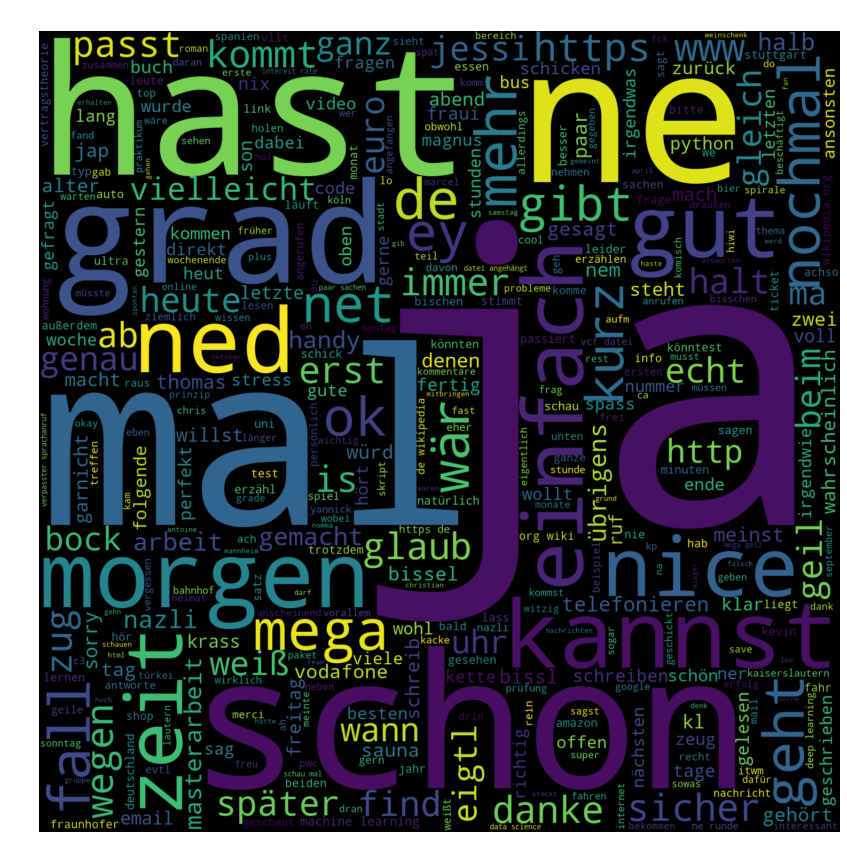

In [11]:
# Here you can pass the argument "who" to only show the wordcloud for a certain person.
# The default setting of who is 'all' such that the wordcloud considers all messages. 
wa.plot_wordcloud(who='all')